# Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
item=pd.read_csv("olist_order_items_dataset.csv")
order=pd.read_csv("olist_orders_dataset.csv")
product=pd.read_csv("olist_products_dataset.csv")

# EDA ON ITEM TABLE 

In [3]:
item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<Figure size 720x720 with 0 Axes>

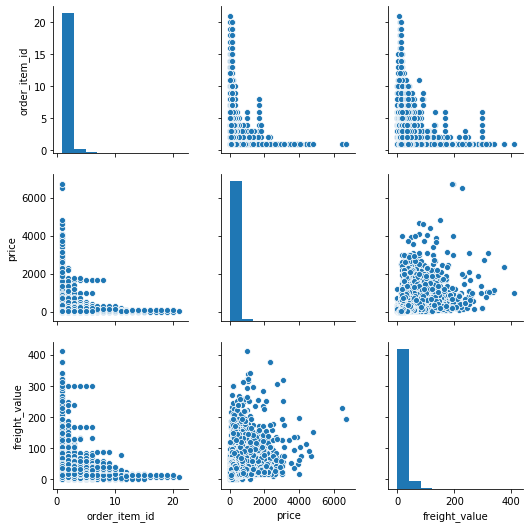

In [4]:
#Pairplot
plt.figure(figsize=(10,10))
sns.pairplot(item)

In [5]:
from datetime import datetime as dt
item["shipping_limit_date"] = item["shipping_limit_date"].apply(lambda d: (dt.strptime(d, '%Y-%m-%d %H:%M:%S')))

In [6]:
item["year"] = item["shipping_limit_date" ].dt.year
item["month"] = item[ "shipping_limit_date"].dt.month
item["day"] = item[ "shipping_limit_date"].dt.day
str(item["shipping_limit_date" ].dt.time)
item['time']=item["shipping_limit_date" ].dt.time

In [7]:
item["year"] =item["shipping_limit_date" ].dt.year
item["month"] = item[ "shipping_limit_date"].dt.month
item["day"] = item[ "shipping_limit_date"].dt.day

In [8]:
item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year,month,day,time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017,9,19,09:45:35
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017,5,3,11:05:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018,1,18,14:48:30
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018,8,15,10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017,2,13,13:57:51


In [9]:
item.shape

(112650, 11)

In [10]:
#checking for null value bt as we can see their is no null value inside item table
item.isnull().sum().sort_values()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
year                   0
month                  0
day                    0
time                   0
dtype: int64

In [11]:
# Checking for Duplicate Order id
item[item.duplicated(['order_id'], keep=False)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year,month,day,time
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,2018,2,21,02:55:52
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,2018,2,21,02:55:52
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,2017,10,20,16:07:52
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,2017,10,20,16:07:52
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,2017,10,20,16:07:52
...,...,...,...,...,...,...,...,...,...,...,...
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,2018,3,27,12:29:22
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,2017,11,3,02:55:58
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,2017,11,3,02:55:58
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,2017,11,3,02:55:58


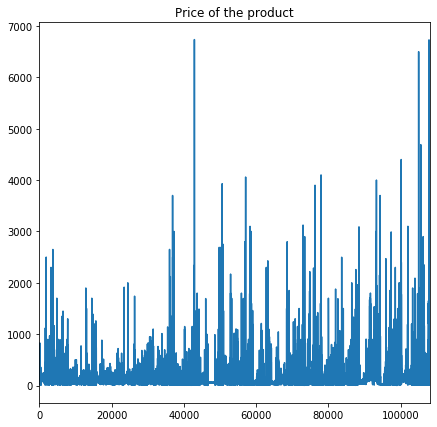

In [108]:
#price plot
plt.figure(figsize=(7,7))
plt.title("Price of the product")
df["price"].plot()

In [110]:
#Maximum value of price
df['price'].max()

6735.0

utilidades_domesticas has the maximum price

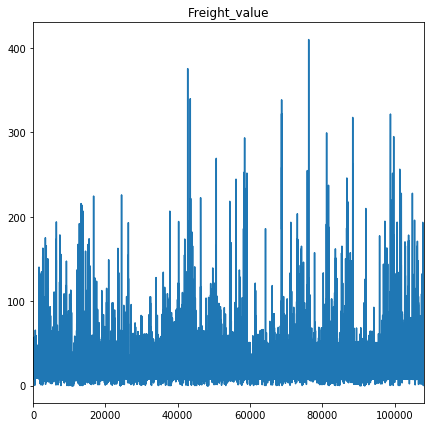

In [111]:
#freightValue plot
plt.figure(figsize=(7,7))
plt.title("Freight_value")
df["freight_value"].plot()

In [112]:
#Maximum value 
df["freight_value"].max()

409.68

bebes has the maximum freight value

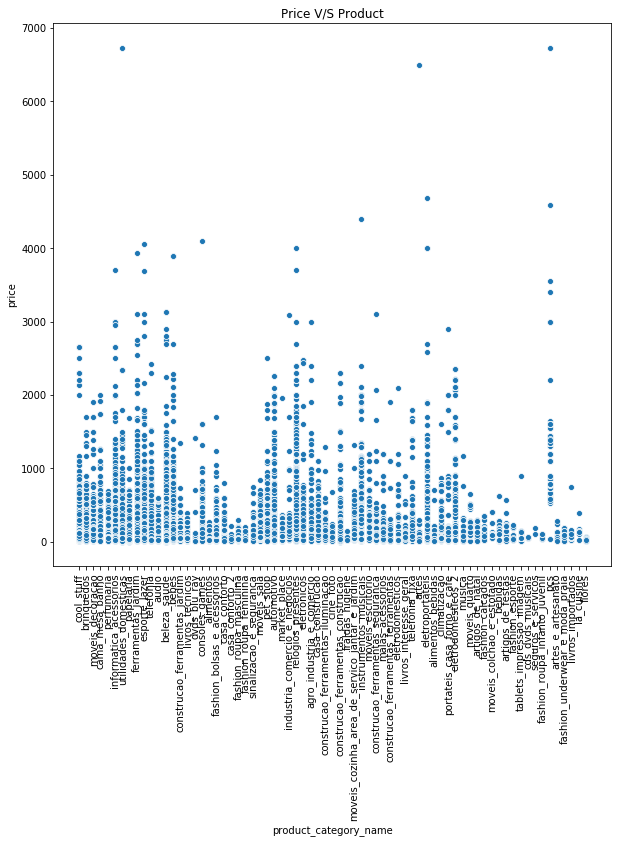

In [115]:
#relation between price and product
plt.figure(figsize=(10,10))
plt.title("Price V/S Product")
plt.xlabel("Price")
plt.ylabel("Product")
plt.xticks(rotation='vertical')
sns.scatterplot(df["product_category_name"],df["price"])

# EDA ON ORDER TABLE

In [12]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
order.shape

(99441, 8)

In [14]:
#checking for null value as we can see there are three column having null values
order.isnull().sum().sort_values()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

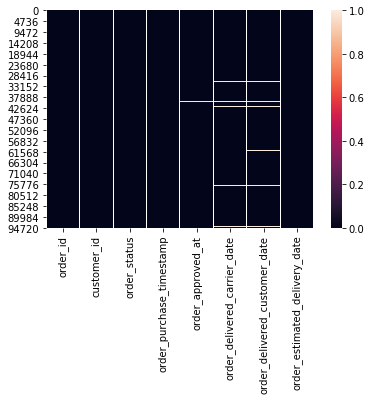

In [15]:
#heatmap for null values
sns.heatmap(order.isnull())
plt.show()

In [16]:
# converting all the date related features from object type to date time format
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
order['order_approved_at'] = pd.to_datetime(order['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

In [17]:
# we have taken median of differences between order_approved_at and order_purchased and then filled the nan values with sum of order_purchased and diff
diff = (order['order_approved_at'] - order['order_purchase_timestamp']).median()
order['order_approved_at'].fillna(order['order_purchase_timestamp'] + diff,inplace=True)

In [18]:
# we have taken median of differences between order_delivered_carrier_date and order_approved_at and then filled the nan values with sum of order_approved_at and diff
diff = (order['order_delivered_carrier_date'] - order['order_approved_at']).median()
order['order_delivered_carrier_date'].fillna(order['order_approved_at'] + diff,inplace=True)

In [19]:
# we have taken median of differences between order_delivered_customer_date and order_delivered_carrier_date and then filled the nan values with sum of order_delivered_carrier_date and diff
diff = (order['order_delivered_customer_date'] - order['order_delivered_carrier_date']).median()
order['order_delivered_customer_date'].fillna(order['order_delivered_carrier_date'] + diff,inplace=True)

In [20]:
# creating one more column delayed or not where 0=within time and 1=delayed
order['delayed'] = np.where(order['order_delivered_customer_date']>order['order_estimated_delivery_date'],1,0)

In [21]:
# creating new column ie. delivery time duration = time duration between delivered to customer date and purchase timestamp
order['delivery_time_duration'] = order['order_delivered_customer_date'] - order['order_purchase_timestamp']

In [22]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delivery_time_duration
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0,2 days 20:58:23


In [23]:
order.isnull().sum().sort_values()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delayed                          0
delivery_time_duration           0
dtype: int64

In [24]:
# Checking for Duplicate Order id-There is no duplicates inside order table
order[order.duplicated(['order_id'], keep=False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delayed,delivery_time_duration


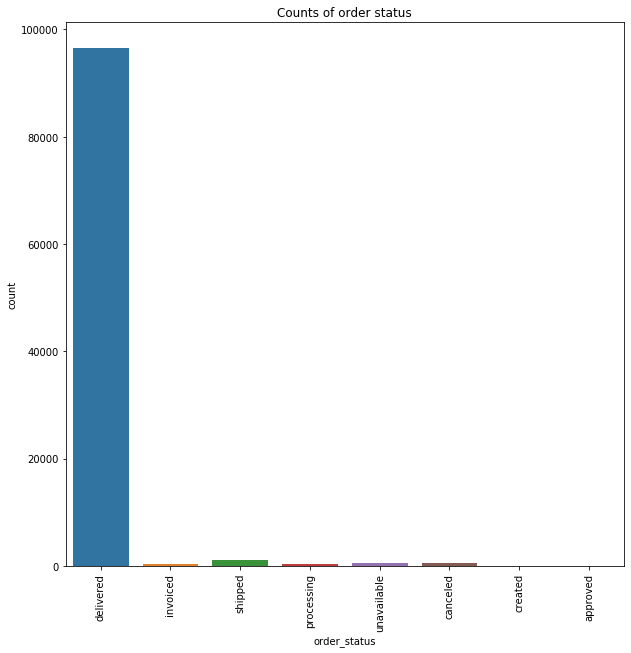

In [25]:
#count plot of order status
plt.figure(figsize=(10,10))
plt.title("Counts of order status")
plt.xticks(rotation='vertical')
sns.countplot(x='order_status',data=order)

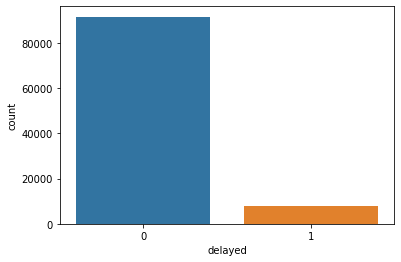

In [117]:
sns.countplot(x='delayed',data=order)

# EDA ON PRODUCT TABLE

In [26]:
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


F:\anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
F:\anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 720x720 with 0 Axes>

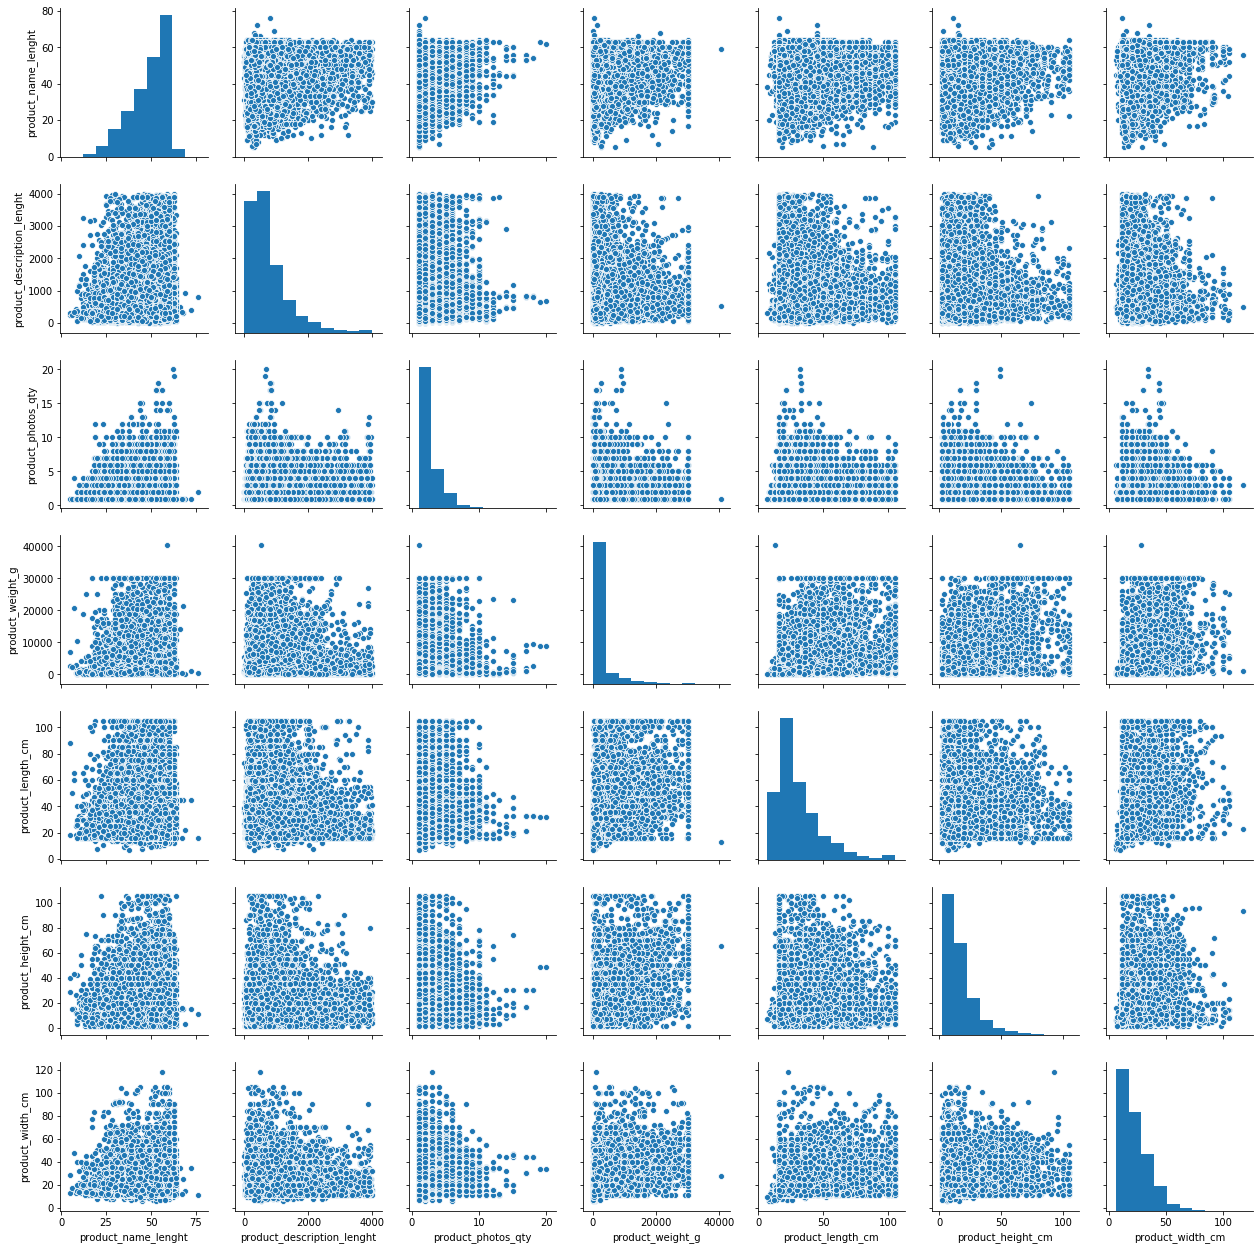

In [27]:
#Pairplot
plt.figure(figsize=(10,10))
sns.pairplot(product)

In [28]:
product.shape

(32951, 9)

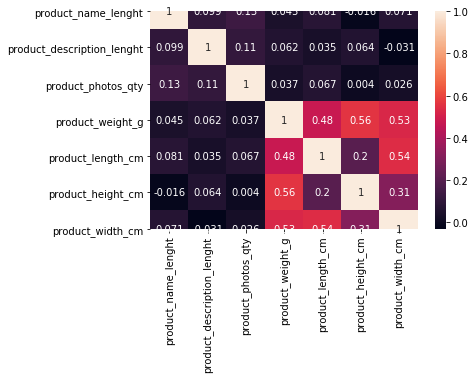

In [29]:
#correlation
CORR=product.corr()
sns.heatmap(CORR,annot=True)

In [30]:
# Checking for Duplicate Order id-There is no duplicates inside order table
product[product.duplicated(['product_id'], keep=False)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [31]:
#checking for null value
product.isnull().sum().sort_values()

product_id                      0
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
dtype: int64

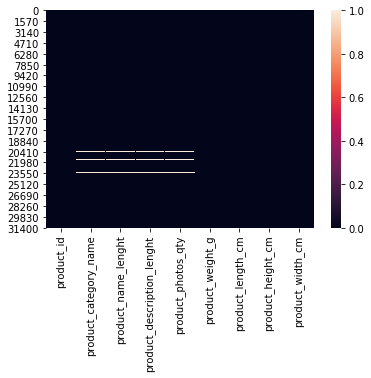

In [32]:
#heatmap
sns.heatmap(product.isnull())
plt.show()

In [33]:
product.groupby(['product_category_name','product_id'], as_index=False).agg(set)

,product_category_name,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,agro_industria_e_comercio,018ca97302e4293050cc41413194bb19,{45.0},{266.0},{1.0},{2467.0},{28.0},{26.0},{24.0}
1,agro_industria_e_comercio,026f43af35e7951067097527d5c31bcc,{58.0},{1075.0},{1.0},{10317.0},{52.0},{33.0},{43.0}
2,agro_industria_e_comercio,07f01b6fcacc1b187a71e5074199db2d,{39.0},{430.0},{1.0},{16400.0},{63.0},{66.0},{56.0}
3,agro_industria_e_comercio,0a0adf0de1769b2970f3096d0b5abfb7,{47.0},{418.0},{1.0},{13325.0},{41.0},{42.0},{47.0}
4,agro_industria_e_comercio,0a27862bbf658a5b8cf655761bc5c72d,{53.0},{642.0},{1.0},{2000.0},{65.0},{22.0},{38.0}
...,...,...,...,...,...,...,...,...,...
32336,utilidades_domesticas,ff95ac47246ef13e48712ea1ff8df0d9,{54.0},{614.0},{1.0},{5300.0},{30.0},{35.0},{30.0}
32337,utilidades_domesticas,ffaaddefb271481c66d4bd79844ecdae,{45.0},{316.0},{1.0},{200.0},{25.0},{10.0},{20.0}
32338,utilidades_domesticas,ffbc83054b3741a8d67fc59d9cf9d42d,{48.0},{231.0},{3.0},{800.0},{16.0},{16.0},{15.0}
32339,utilidades_domesticas,ffc88104d219c1b767d566fd93653dd2,{49.0},{428.0},{2.0},{675.0},{33.0},{9.0},{32.0}


In [34]:
#filling missing value of product category name as others
product['product_category_name'].fillna('others', inplace = True)

In [35]:
product[product['product_category_name']=='others']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,others,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,others,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,others,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,others,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,others,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,others,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,others,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,others,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,others,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [36]:
product['product_weight_g'].fillna(product['product_weight_g'].mean(), inplace = True)
product['product_length_cm'].fillna(product['product_length_cm'].mean(), inplace = True)
product['product_height_cm'].fillna(product['product_height_cm'].mean(), inplace = True)
product['product_width_cm'].fillna(product['product_width_cm'].mean(), inplace = True)

In [37]:
product.isnull().sum().sort_values()

product_id                      0
product_category_name           0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
dtype: int64

In [38]:
product['product_name_lenght'].fillna(product['product_name_lenght'].mean(), inplace = True)
product['product_description_lenght'].fillna(product['product_description_lenght'].mean(), inplace = True)
product['product_photos_qty'].fillna(product['product_photos_qty'].mean(), inplace = True)

In [39]:
#There is no null value remaining now
product.isnull().sum().sort_values()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

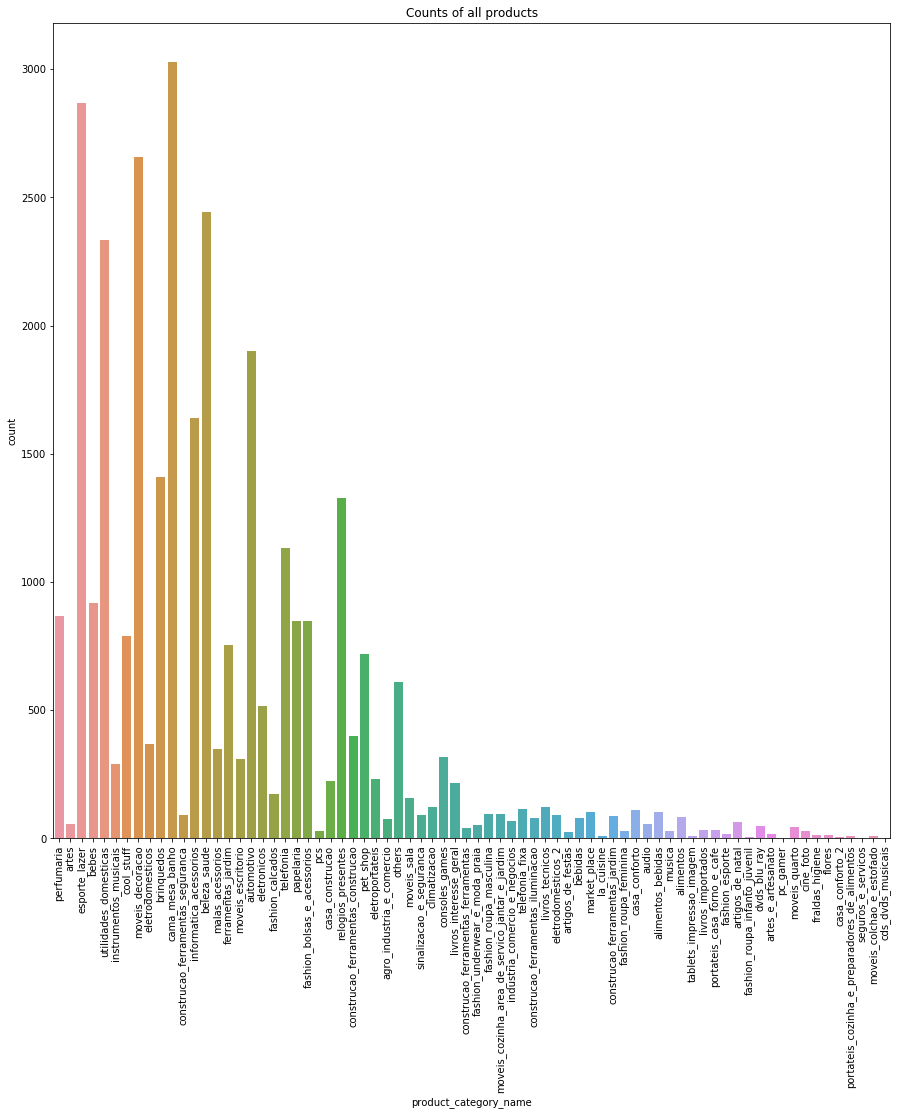

In [40]:
#count plot of product
plt.figure(figsize=(15,15))
plt.title("Counts of all products")
plt.xticks(rotation='vertical')
sns.countplot(x='product_category_name',data=product)

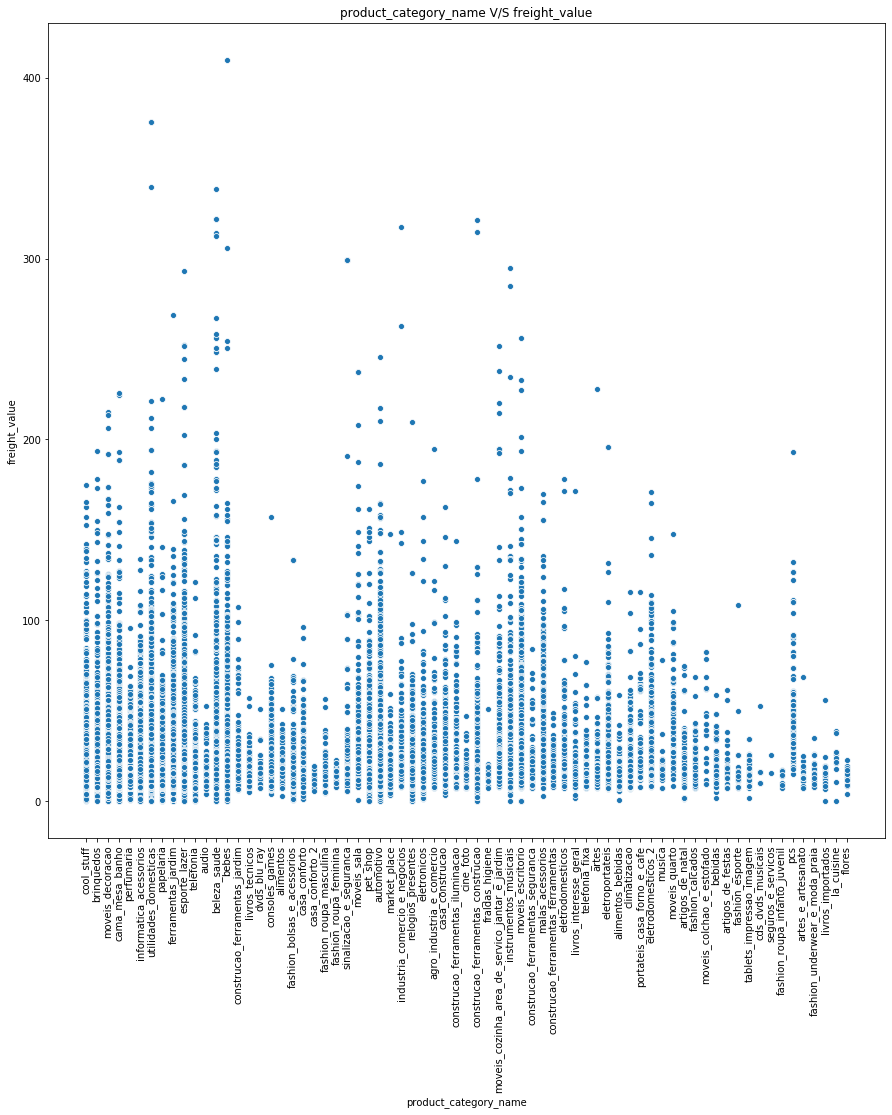

In [118]:
#relation between product_category_name V/S freight_value
plt.figure(figsize=(15,15))
plt.title("product_category_name V/S freight_value")
plt.xlabel("product_category_name")
plt.ylabel("freight_value")
plt.xticks(rotation='vertical')
sns.scatterplot(df["product_category_name"],df["freight_value"])

# EDA ON CUSTOMER DATA

In [41]:
customer=pd.read_csv("olist_customers_dataset.csv")

In [42]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [43]:
customer.shape

(99441, 5)

<Figure size 720x720 with 0 Axes>

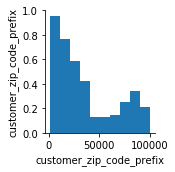

In [44]:
#Pairplot
plt.figure(figsize=(10,10))
sns.pairplot(customer)

In [45]:
#checking for null value as we can see there is no null value present
customer.isnull().sum().sort_values()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [46]:
# Checking for Duplicate Order id
customer[customer.duplicated(['customer_unique_id'], keep=False)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,sao paulo,SP
32,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,camacari,BA
33,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [47]:
# dropping ALL duplicte values 
customer.sort_values('customer_unique_id', inplace=True)
customer.drop_duplicates(subset='customer_unique_id', keep=False, inplace=True)

In [48]:
# displaying data 
customer['customer_unique_id'].duplicated().sum()

0

In [49]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93099 entries, 64012 to 83624
Data columns (total 5 columns):
customer_id                 93099 non-null object
customer_unique_id          93099 non-null object
customer_zip_code_prefix    93099 non-null int64
customer_city               93099 non-null object
customer_state              93099 non-null object
dtypes: int64(1), object(4)
memory usage: 4.3+ MB


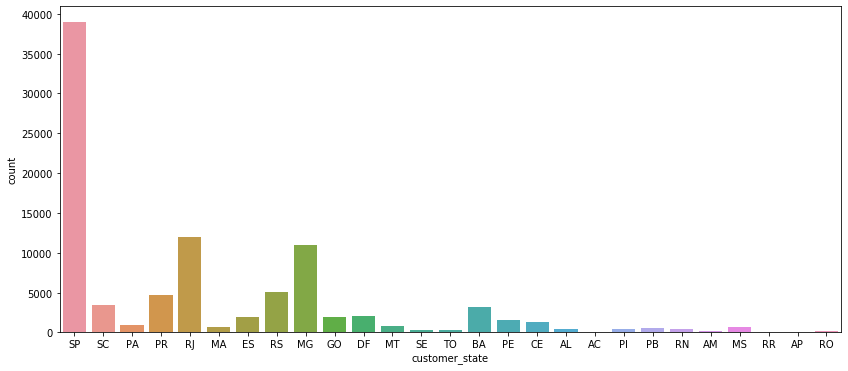

In [50]:
plt.figure(figsize = (14,6))
sns.countplot(x='customer_state',data=customer)

# EDA ON GEOLOCATION DATASET

In [51]:
geo=pd.read_csv("olist_geolocation_dataset.csv")

In [52]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [53]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
geolocation_zip_code_prefix    1000163 non-null int64
geolocation_lat                1000163 non-null float64
geolocation_lng                1000163 non-null float64
geolocation_city               1000163 non-null object
geolocation_state              1000163 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [54]:
geo.shape

(1000163, 5)

<Figure size 720x720 with 0 Axes>

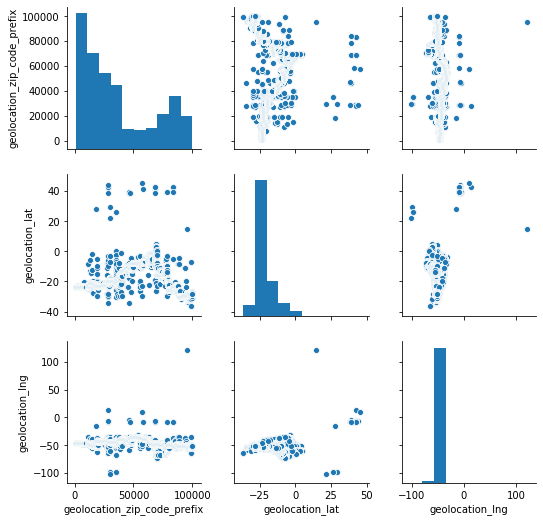

In [55]:
#Pairplot
plt.figure(figsize=(10,10))
sns.pairplot(geo)

In [56]:
#checking for null value as we can see there is no null value
geo.isnull().sum().sort_values()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [57]:
# Checking for Duplicate Order id
geo[geo.duplicated(['geolocation_zip_code_prefix'], keep=False)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


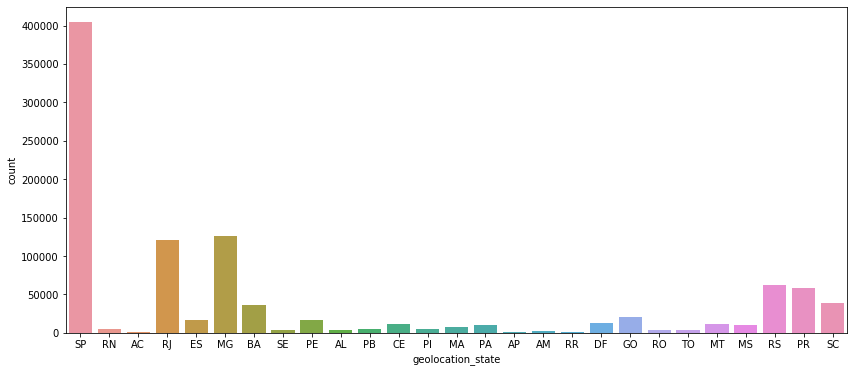

In [58]:
plt.figure(figsize = (14,6))
sns.countplot(x='geolocation_state',data=geo)

# EDA ON REVIEWS DATASET

In [59]:
review=pd.read_csv("olist_order_reviews_dataset.csv") 

In [60]:
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [61]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [62]:
review.shape

(100000, 7)

<Figure size 720x720 with 0 Axes>

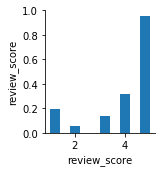

In [63]:
#Pairplot
plt.figure(figsize=(10,10))
sns.pairplot(review)

In [64]:
#checking for null value
review.isnull().sum().sort_values()

review_id                      0
order_id                       0
review_score                   0
review_creation_date           0
review_answer_timestamp        0
review_comment_message     58247
review_comment_title       88285
dtype: int64

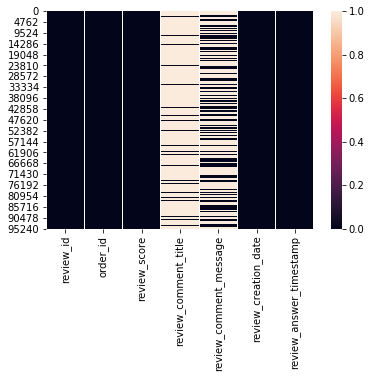

In [65]:
sns.heatmap(review.isnull())

In [66]:
review = review.drop('review_comment_message',axis=1)

In [67]:
def fill_title(row):
    if row['review_score'] >4:
        val = "Super recomended"
    elif row['review_score'] >3:
        val = "Recomended"
    elif row['review_score'] >2:
        val = "Average"
    elif row['review_score'] >1:
        val = "Not good"
    else:    
        val = 'Very Bad'
    return val

In [68]:
review['review_comment_title'] = review.apply(fill_title, axis=1)

In [69]:
review.isnull().sum().sort_values()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

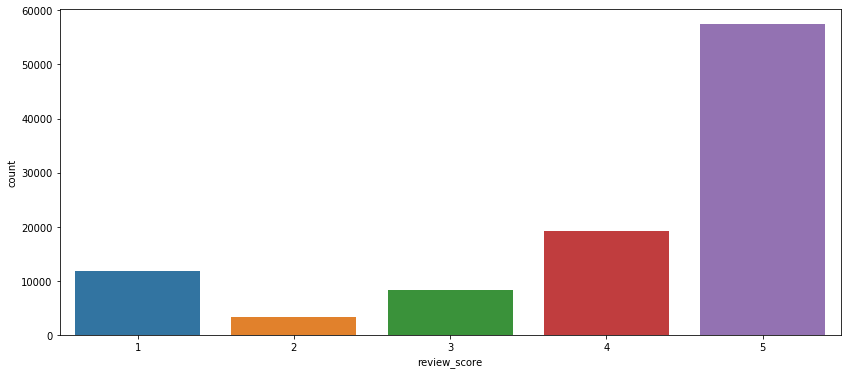

In [70]:
plt.figure(figsize = (14,6))
sns.countplot(x='review_score',data=review)

In [71]:
#Converting review creation date to datetimeseries
from datetime import datetime as dt
review['review_creation_date']=pd.to_datetime(review['review_creation_date'],format="%Y-%m-%d %H:%M:%S")

In [72]:
review['review_answer_timestamp']=pd.to_datetime(review['review_answer_timestamp'],format="%Y-%m-%d %H:%M:%S")

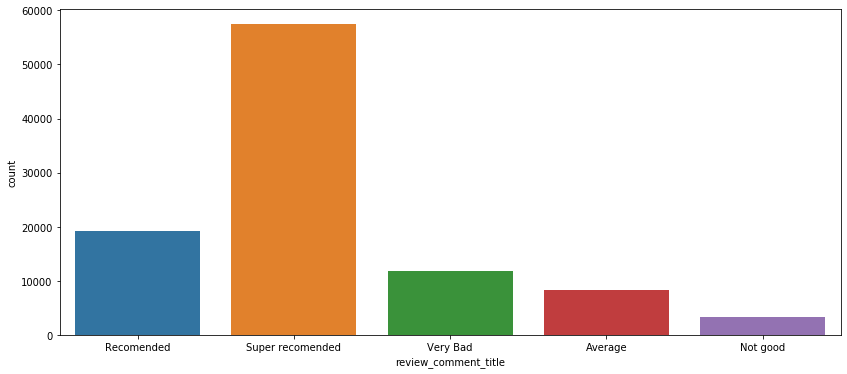

In [73]:
plt.figure(figsize = (14,6))
sns.countplot(review['review_comment_title'])

In [74]:
review["year"] =review["review_creation_date"].dt.year
review["month"] = review["review_creation_date"].dt.month
review["day"] = review["review_creation_date"].dt.day

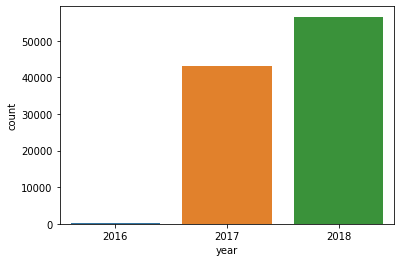

In [75]:
sns.countplot(x='year',data=review)

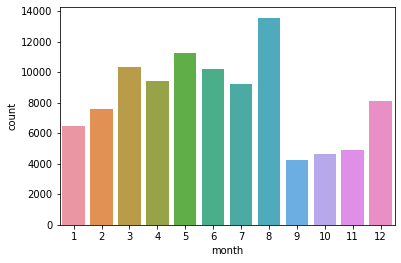

In [76]:
sns.countplot(x='month',data=review)

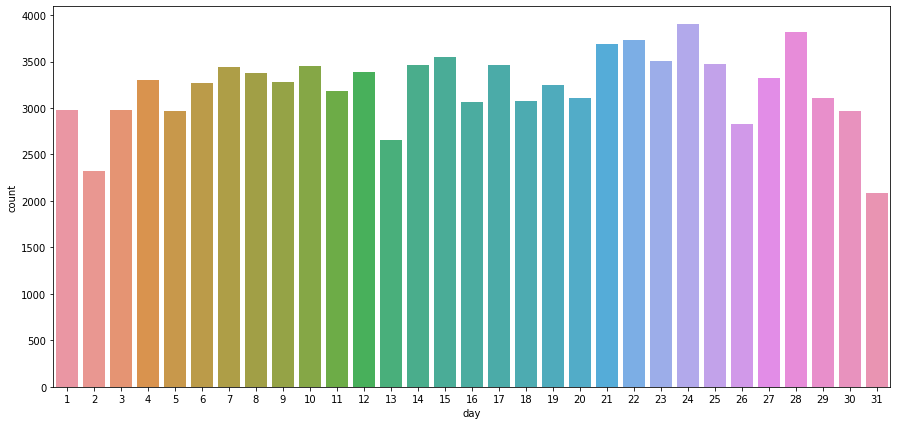

In [77]:
plt.figure(figsize = (15,7))
sns.countplot(review['day'])

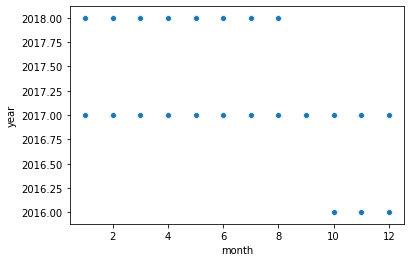

In [78]:
sns.scatterplot(data=review, x="month", y="year")

# EDA ON PAYMENT DATASET

In [79]:
payment=pd.read_csv("olist_order_payments_dataset.csv")

In [80]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [81]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [82]:
payment.shape

(103886, 5)

<Figure size 720x720 with 0 Axes>

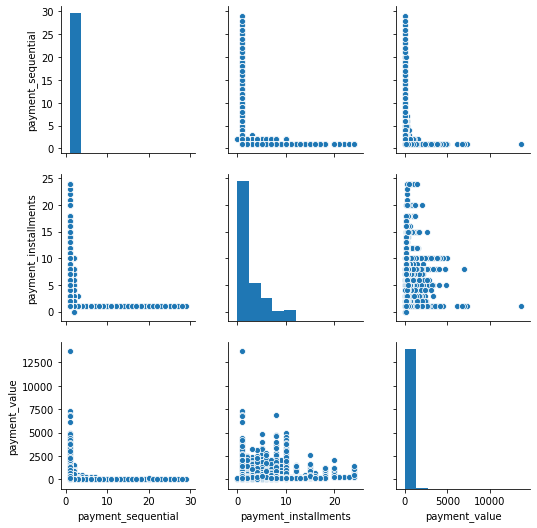

In [83]:
#Pairplot
plt.figure(figsize=(10,10))
sns.pairplot(payment)

In [84]:
#checking for null value
payment.isnull().sum().sort_values()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

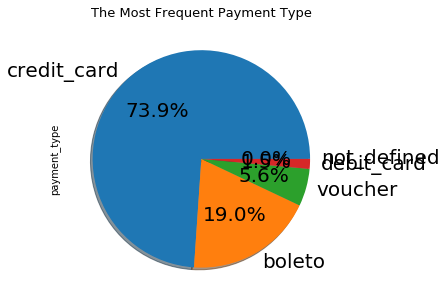

In [85]:
payment["payment_type"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    fontsize=20,
    figsize=(5,5),
    shadow=True
    
)
plt.title('The Most Frequent Payment Type'.title() , fontsize=13);

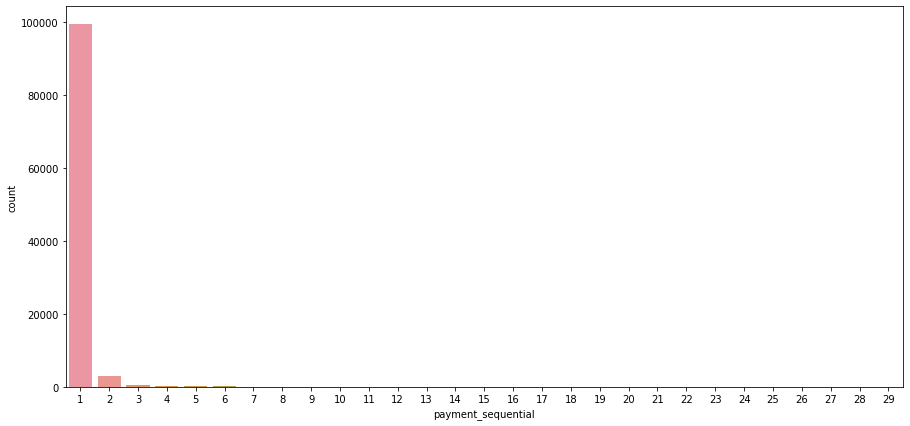

In [86]:
plt.figure(figsize = (15,7))
sns.countplot(x='payment_sequential',data=payment)

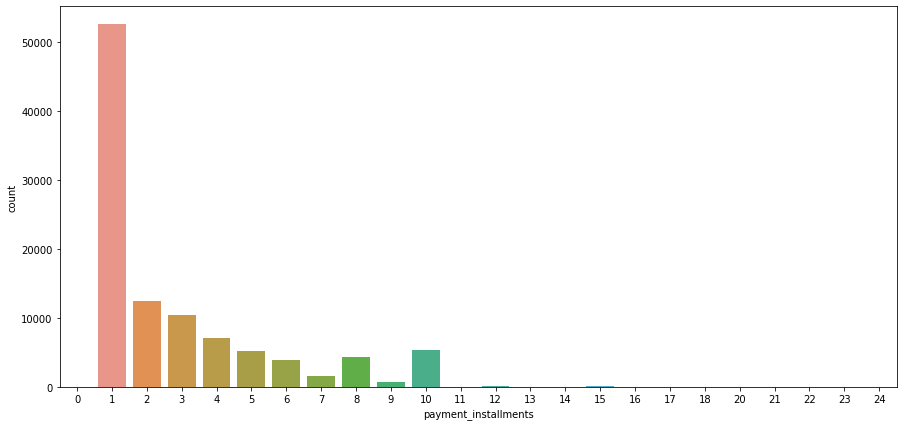

In [87]:
plt.figure(figsize = (15,7))
sns.countplot(x='payment_installments',data=payment)

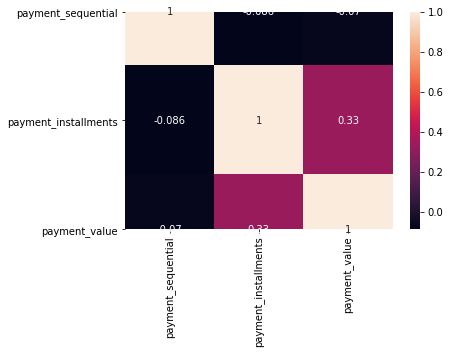

In [88]:
sns.heatmap(payment.corr(),annot=True)

# EDA ON SELLER DATASET

In [89]:
seller=pd.read_csv("olist_sellers_dataset.csv")

In [90]:
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [91]:
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
seller_id                 3095 non-null object
seller_zip_code_prefix    3095 non-null int64
seller_city               3095 non-null object
seller_state              3095 non-null object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [92]:
seller.shape

(3095, 4)

<Figure size 720x720 with 0 Axes>

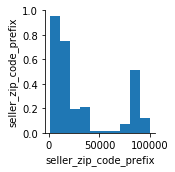

In [93]:
#Pairplot
plt.figure(figsize=(10,10))
sns.pairplot(seller)

In [94]:
#checking for null value as we can see their is no null value
seller.isnull().sum().sort_values()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

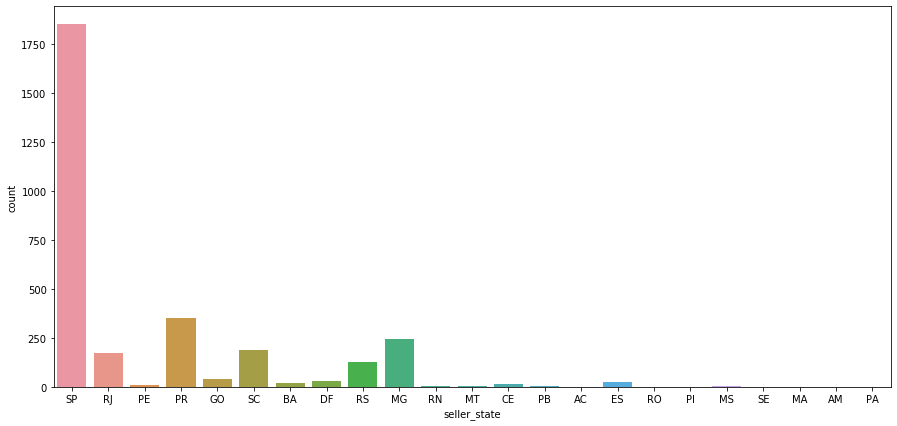

In [95]:
plt.figure(figsize = (15,7))
sns.countplot(x='seller_state',data=seller)

# EDA ON PRODUCT CATEGORY NAME DATASET

In [96]:
product_name=pd.read_csv("product_category_name_translation.csv")

In [97]:
product_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [98]:
product_name.shape

(71, 2)

# Merging All Table

In [130]:
#merging all dataset into single dataset
df=pd.merge(item,product,on='product_id')
df=pd.merge(df,order,how='inner',on='order_id')
df=pd.merge(df,review,how='inner', on='order_id')
df=pd.merge(df,payment,how='inner',on='order_id')
df=pd.merge(df,customer,how='inner',on='customer_id')
df=pd.merge(df,seller,how='inner',on='seller_id')
df=pd.merge(df,product_name,how='inner',on='product_category_name')

In [131]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year_x,month_x,day_x,...,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,2017,9,19,...,2,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,2017,7,5,...,1,73.86,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,2018,5,23,...,2,83.23,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,2017,8,7,...,3,75.07,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,2017,8,16,...,4,72.19,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,27277,volta redonda,SP,cool_stuff


In [132]:
df.drop(columns=['year_x', 'month_x','day_x','year_y','order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date','review_answer_timestamp',
       'order_estimated_delivery_date', 'delayed','shipping_limit_date','payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'delivery_time_duration', 'month_y', 'day_y','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','time','product_length_cm','product_height_cm','product_width_cm','seller_zip_code_prefix','customer_zip_code_prefix'], inplace=True)

In [133]:
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value', 'product_category_name', 'customer_id', 'review_id',
       'review_score', 'review_comment_title', 'review_creation_date',
       'customer_unique_id', 'customer_city', 'customer_state', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

In [134]:
df.shape

(108072, 18)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108072 entries, 0 to 108071
Data columns (total 18 columns):
order_id                         108072 non-null object
order_item_id                    108072 non-null int64
product_id                       108072 non-null object
seller_id                        108072 non-null object
price                            108072 non-null float64
freight_value                    108072 non-null float64
product_category_name            108072 non-null object
customer_id                      108072 non-null object
review_id                        108072 non-null object
review_score                     108072 non-null int64
review_comment_title             108072 non-null object
review_creation_date             108072 non-null datetime64[ns]
customer_unique_id               108072 non-null object
customer_city                    108072 non-null object
customer_state                   108072 non-null object
seller_city                      108072 n

In [136]:
# Checking for Any NAN Value are present or not
df.isnull().values.any()

False

In [137]:
df.isnull().sum().sort_values()

order_id                         0
seller_city                      0
customer_state                   0
customer_city                    0
customer_unique_id               0
review_creation_date             0
review_comment_title             0
review_score                     0
review_id                        0
customer_id                      0
product_category_name            0
freight_value                    0
price                            0
seller_id                        0
product_id                       0
order_item_id                    0
seller_state                     0
product_category_name_english    0
dtype: int64

In [138]:
#convert the clean dataset into another csv file  
df.to_csv('Combined.csv')